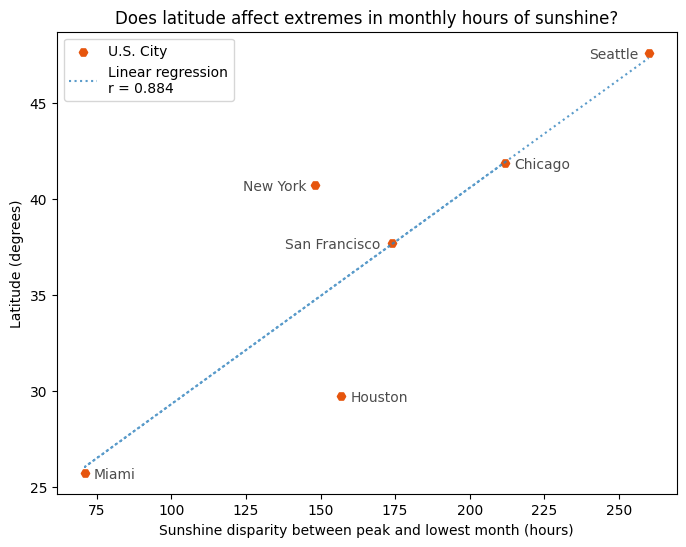

In [37]:
#Assignment 1: Climate data code

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import csv #used Python documentation to work this out
import scipy.stats as stats

#function from DM-GY 9103 Machine Learning for Media workbook
def list_from_key(objects, key):
  new_list = []
  for city in objects:
    if key == "sunshine" or key == "lat" or key == "lon":
        new_list.append(float(city[key]))
    else:
        new_list.append(city[key])
  return new_list

file_path = "./data/climate.csv" 
climate_info = []
with open(file_path) as file:
    reader = csv.DictReader(file)
    for row in reader:
        climate_info.append(row)

chicago_data = []
houston_data = []
miami_data = []
ny_data = []
sf_data = []
seattle_data = []

for item in climate_info:
    if item["city"] == "Chicago":
        chicago_data.append(item)
    elif item["city"] == "Houston":
        houston_data.append(item)
    elif item["city"] == "Miami":
        miami_data.append(item)
    elif item["city"] == "New York":
        ny_data.append(item)
    elif item["city"] == "San Francisco":
        sf_data.append(item)
    elif item["city"] == "Seattle":
        seattle_data.append(item)

latitude_list = []
longitude_list = []

for i, city in enumerate(climate_info):
    if (i % 12 == 0):
        latitude_list.append(float(city["lat"]))
        longitude_list.append(float(city["lon"]))

#list of differences between months with most and fewest hours of sunshine for each city
difference_list = []

chicago_sunshine = list_from_key(chicago_data, "sunshine")
chicago_difference = max(chicago_sunshine) - min(chicago_sunshine)
difference_list.append(chicago_difference)

houston_sunshine = list_from_key(houston_data, "sunshine")
houston_difference = max(houston_sunshine) - min(houston_sunshine)
difference_list.append(houston_difference)

miami_sunshine = list_from_key(miami_data, "sunshine")
miami_difference = max(miami_sunshine) - min(miami_sunshine)
difference_list.append(miami_difference)

ny_sunshine = list_from_key(ny_data, "sunshine")
ny_difference = max(ny_sunshine) - min(ny_sunshine)
difference_list.append(ny_difference)

sf_sunshine = list_from_key(sf_data, "sunshine")
sf_difference = max(sf_sunshine) - min(sf_sunshine)
difference_list.append(sf_difference)

seattle_sunshine = list_from_key(seattle_data, "sunshine")
seattle_difference = max(seattle_sunshine) - min(seattle_sunshine)
difference_list.append(seattle_difference)

res = stats.linregress(difference_list, latitude_list)
best_fit = [(res.intercept + res.slope * (diff)) for diff in difference_list]

plt.figure(figsize=(8, 6))
plt.scatter(difference_list, latitude_list, color="#e6550d", marker='H')
plt.plot(difference_list, best_fit, "#3182bd", ls="dotted", alpha=0.8)
plt.legend(["U.S. City", "Linear regression\nr = " + str(round(res.rvalue, 3))])

plt.annotate("Chicago", (chicago_difference + 3, latitude_list[0]- 0.3), alpha = 0.7)
plt.annotate("Houston", (houston_difference + 3, latitude_list[1]- 0.3), alpha = 0.7)
plt.annotate("Miami", (miami_difference + 3, latitude_list[2]- 0.3), alpha = 0.7)
plt.annotate("New York", (ny_difference - 24, latitude_list[3]- 0.3), alpha = 0.7)
plt.annotate("San Francisco", (sf_difference - 36, latitude_list[4]- 0.3), alpha = 0.7)
plt.annotate("Seattle", (seattle_difference - 20, latitude_list[5] - 0.3), alpha = 0.7)

plt.title("Does latitude affect extremes in monthly hours of sunshine?")
plt.xlabel("Sunshine disparity between peak and lowest month (hours)")
plt.ylabel("Latitude (degrees)")
plt.show()